In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# dataset = '/Users/austinbrian/dev/blog/datasets/FOIA Request for Licensed Dogs By Zip 2015 to 2016 (Rabinowitz) 2016-FOIA-03763.xls'
# dogs = pd.read_excel(dataset)

In [3]:
# This dataset is ugly; here is what's wrong with it:
# 1. Each entry is over three lines
# 2. There is a strange header
# 3. There is a total line for every zip code, which is inconvenient
# 4. Several of the header columns are merged cells

In [4]:
# Was able to fix several things in excel, then save as csv
fixed_csv = '/Users/austinbrian/dev/blog/datasets/dc_dog_data_2016.csv'
# this fixes: header, merged cells
# does not fix: three-line entries, total column

In [5]:
import csv
with open(fixed_csv,'rU') as d:
    reader = csv.reader(d)
    rows = [i for i in reader]
close(d)

In [6]:
print(rows[:8])

[['\xef\xbb\xbfLicense Number', 'License Status', 'Status Date/Time', 'License Type', '', 'License Issuer', 'License Reseller', 'License Price', 'License Site'], ['License Length', '', 'Expire Date', 'Renewal Yes/No', '', 'Rabies Vaccination', 'Vaccination Date', 'Revaccination Date', 'Provider'], ['Animal Number', 'ARN', 'Animal Name', 'DOB', 'Species', 'Primary / Secondary Breed', '', 'Color', 'Altered / Gender'], ['', '', 'Total Licenses: 36', '', 'Unique Animals: 36', '', '', 'Total Price: $925.00', ''], ['7007', 'Expired', '42487.04167', 'Dog License S/N', '', 'DC Department of Health', '', '15', 'New York Ave'], ['1 Years', '', '6/30/2015', 'No', '', '', '', '', ''], ['A10699124', '', 'Zeus', '6/25/2009', 'Dog', 'Boxer / Terrier, Pit Bull', '', 'Brindle / Black', 'Yes / Male'], ['7491', 'Current', '42215.49193', 'Dog License S/N', '', 'DC Department of Health', 'DC Animal Care and Control', '15', 'New York Ave']]


In [10]:
rows[0:15]

[['License Number',
  'License Status',
  'Status Date/Time',
  'License Type',
  '',
  'License Issuer',
  'License Reseller',
  'License Price',
  'License Site'],
 ['License Length',
  '',
  'Expire Date',
  'Renewal Yes/No',
  '',
  'Rabies Vaccination',
  'Vaccination Date',
  'Revaccination Date',
  'Provider'],
 ['Animal Number',
  'ARN',
  'Animal Name',
  'DOB',
  'Species',
  'Primary / Secondary Breed',
  '',
  'Color',
  'Altered / Gender'],
 ['',
  '',
  'Total Licenses: 36',
  '',
  'Unique Animals: 36',
  '',
  '',
  'Total Price: $925.00',
  ''],
 ['7007',
  'Expired',
  '42487.04167',
  'Dog License S/N',
  '',
  'DC Department of Health',
  '',
  '15',
  'New York Ave'],
 ['1 Years', '', '6/30/2015', 'No', '', '', '', '', ''],
 ['A10699124',
  '',
  'Zeus',
  '6/25/2009',
  'Dog',
  'Boxer / Terrier, Pit Bull',
  '',
  'Brindle / Black',
  'Yes / Male'],
 ['7491',
  'Current',
  '42215.49193',
  'Dog License S/N',
  '',
  'DC Department of Health',
  'DC Animal Care a

In [8]:
rows[0][0]=rows[0][0][3:]

In [14]:
rows[:9]

[['License Number',
  'License Status',
  'Status Date/Time',
  'License Type',
  '',
  'License Issuer',
  'License Reseller',
  'License Price',
  'License Site'],
 ['License Length',
  '',
  'Expire Date',
  'Renewal Yes/No',
  '',
  'Rabies Vaccination',
  'Vaccination Date',
  'Revaccination Date',
  'Provider'],
 ['Animal Number',
  'ARN',
  'Animal Name',
  'DOB',
  'Species',
  'Primary / Secondary Breed',
  '',
  'Color',
  'Altered / Gender'],
 ['',
  '',
  'Total Licenses: 36',
  '',
  'Unique Animals: 36',
  '',
  '',
  'Total Price: $925.00',
  ''],
 ['7007',
  'Expired',
  '42487.04167',
  'Dog License S/N',
  '',
  'DC Department of Health',
  '',
  '15',
  'New York Ave'],
 ['1 Years', '', '6/30/2015', 'No', '', '', '', '', ''],
 ['A10699124',
  '',
  'Zeus',
  '6/25/2009',
  'Dog',
  'Boxer / Terrier, Pit Bull',
  '',
  'Brindle / Black',
  'Yes / Male'],
 ['7491',
  'Current',
  '42215.49193',
  'Dog License S/N',
  '',
  'DC Department of Health',
  'DC Animal Care a

In [12]:
header = rows[:3]
header
    

[['License Number',
  'License Status',
  'Status Date/Time',
  'License Type',
  '',
  'License Issuer',
  'License Reseller',
  'License Price',
  'License Site'],
 ['License Length',
  '',
  'Expire Date',
  'Renewal Yes/No',
  '',
  'Rabies Vaccination',
  'Vaccination Date',
  'Revaccination Date',
  'Provider'],
 ['Animal Number',
  'ARN',
  'Animal Name',
  'DOB',
  'Species',
  'Primary / Secondary Breed',
  '',
  'Color',
  'Altered / Gender']]

In [13]:
for i in rows:
    print i[0]

License Number
License Length
Animal Number

7007
1 Years
A10699124
7491
1 Years
A21549697
7954
1 Years
A22929145
7952
1 Years
A22929309
10343
1 Years
A23359053
6741
1 Years
A24727319
7092
1 Years
A28026713
8964
1 Years
A31769555
6990
2 Months
A26956175
6891
1 Years
A25091026
7087
1 Years
A27970585
7557
1 Years
A25024927
7438
1 Years
A29577766
6973
1 Years
A26877550
8499
1 Years
A31606486
7719
1 Years
A30825796
7750
1 Years
A30576243
7646
1 Years
A30043503
7045

A27645524
6853

A24960187
7953
1 Years
A29635869
15402
1 Years
A31985462
8984
1 Years
A31887484
7642
1 Years
A30062098
7862
1 Years
A30353179
8489
1 Years
A31174760
7899
1 Years
A30515286
8417
1 Years
A31185856
7002
1 Years
A27635522
3480
1 Years
A24758220
8914
1 Years
A31421355
6776
1 Years
A24825676
10813
1 Years
A24761714
6911
1 Years
A25219987
7741
1 Years
A30914946
15433
1 Years
A32111021
20001
7201
1 Years
A13107482
15422
1 Years
A13107482
3535
1 Years
A23998109
7514
1 Years
A19199021
3153
1 Years
A22353557
9358
1 Years
A

In [375]:
# Pulling out the total rows
total_rows = []
data_rows = []
for i in rows:
    if i[2][:5] == "Total":
        total_rows.append(i)
    else:
        data_rows.append(i)

In [376]:
# Trying to figure out how to turn these into regular rows

end_of_list = []
for i,val in enumerate(data_rows):
    if i % 3 == 0:
        end_of_list.append(i)

beg_of_list = [i-3 for i in end_of_list]
listrange = zip(beg_of_list,end_of_list)
listrange = listrange[1:]

In [377]:
numlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
numlist[0:24:3]

[0, 3, 6, 9, 12, 15, 18, 21]

In [378]:
for i in numlist:
    newlist = [i for i in numlist[::3]]

In [379]:
newlist[3:10]

[9, 12, 15, 18, 21, 24]

In [380]:
ilist = [i[::3] for i,k in enumerate(data_rows)]


TypeError: 'int' object has no attribute '__getitem__'

In [381]:
data_rows[listrange[-1][0]:listrange[-1][1]]

[['7243',
  'Current',
  '42186.84691',
  'Law Enforcement Dog Lic S/N',
  '',
  'DC Department of Health',
  '',
  '15',
  'New York Ave'],
 ['', '', '', 'No', '', '', '', '', ''],
 ['A28282639',
  '',
  'Blake',
  '',
  'Dog',
  'Terrier / Mix',
  '',
  'Black / White',
  'No / Male']]

In [382]:
datar = sum(data_rows,[])
n = 27
data = [datar[i:i+n] for i in range(0, len(datar), n)]
data[:5]

[['License Number',
  'License Status',
  'Status Date/Time',
  'License Type',
  '',
  'License Issuer',
  'License Reseller',
  'License Price',
  'License Site',
  'License Length',
  '',
  'Expire Date',
  'Renewal Yes/No',
  '',
  'Rabies Vaccination',
  'Vaccination Date',
  'Revaccination Date',
  'Provider',
  'Animal Number',
  'ARN',
  'Animal Name',
  'DOB',
  'Species',
  'Primary / Secondary Breed',
  '',
  'Color',
  'Altered / Gender'],
 ['7007',
  'Expired',
  '42487.04167',
  'Dog License S/N',
  '',
  'DC Department of Health',
  '',
  '15',
  'New York Ave',
  '1 Years',
  '',
  '6/30/2015',
  'No',
  '',
  '',
  '',
  '',
  '',
  'A10699124',
  '',
  'Zeus',
  '6/25/2009',
  'Dog',
  'Boxer / Terrier, Pit Bull',
  '',
  'Brindle / Black',
  'Yes / Male'],
 ['7491',
  'Current',
  '42215.49193',
  'Dog License S/N',
  '',
  'DC Department of Health',
  'DC Animal Care and Control',
  '15',
  'New York Ave',
  '1 Years',
  '',
  '7/30/2016',
  'Yes',
  '',
  'LIC Rabi

In [383]:
# Now everything is in a nice list of lists
# A couple of conversions necessary
dogs= pd.DataFrame(data[1:], columns=data[0])
dogs.head()

,License Number,License Status,Status Date/Time,License Type,,License Issuer,License Reseller,License Price,License Site,License Length,...,Provider,Animal Number,ARN,Animal Name,DOB,Species,Primary / Secondary Breed,,Color,Altered / Gender
0,7007,Expired,42487.04167,Dog License S/N,,DC Department of Health,,15,New York Ave,1 Years,...,,A10699124,,Zeus,6/25/2009,Dog,"Boxer / Terrier, Pit Bull",,Brindle / Black,Yes / Male
1,7491,Current,42215.49193,Dog License S/N,,DC Department of Health,DC Animal Care and Control,15,New York Ave,1 Years,...,,A21549697,,Harley,11/24/2011,Dog,"Retriever, Labrador / Mix",,Blond,Yes / Male
2,7954,Current,42274.6302,Dog License S/N,,DC Department of Health,,15,New York Ave,1 Years,...,,A22929145,,Sunny,8/15/2009,Dog,"Dachshund, Miniature Smooth Haired / Mix",,Brown,Yes / Female
3,7952,Current,42274.66359,Dog License S/N,,DC Department of Health,,15,New York Ave,1 Years,...,,A22929309,,Peanut,6/6/2009,Dog,Pomeranian / Mix,,Brown,Yes / Female
4,10343,Expired,42487.04167,Dog License S/N,,DC Department of Health,,15,Department of Health,1 Years,...,,A23359053,,Dallas,7/18/2012,Dog,"Terrier, American Pit Bull / Chow Chow",,Chocolate,Yes / Male


In [384]:
dogs.DOB = dogs.DOB.replace("",np.nan)
dogs["DOB"] = pd.to_datetime(dogs["DOB"], format="%m/%d/%Y")

In [385]:
dogs.columns

Index([u'License Number', u'License Status', u'Status Date/Time',
       u'License Type', u'', u'License Issuer', u'License Reseller',
       u'License Price', u'License Site', u'License Length', u'',
       u'Expire Date', u'Renewal Yes/No', u'', u'Rabies Vaccination',
       u'Vaccination Date', u'Revaccination Date', u'Provider',
       u'Animal Number', u'ARN', u'Animal Name', u'DOB', u'Species',
       u'Primary / Secondary Breed', u'', u'Color', u'Altered / Gender'],
      dtype='object')

In [386]:
# calculate dog ages
import datetime
today = datetime.datetime.today()
dog_age = map(lambda x: today-x, dogs.DOB)

In [387]:
dog_age[:15]

[Timedelta('2832 days 09:31:39.911335'),
 Timedelta('1950 days 09:31:39.911335'),
 Timedelta('2781 days 09:31:39.911335'),
 Timedelta('2851 days 09:31:39.911335'),
 Timedelta('1713 days 09:31:39.911335'),
 NaT,
 Timedelta('3584 days 09:31:39.911335'),
 Timedelta('4682 days 09:31:39.911335'),
 Timedelta('2540 days 09:31:39.911335'),
 Timedelta('3672 days 09:31:39.911335'),
 Timedelta('1398 days 09:31:39.911335'),
 Timedelta('1129 days 09:31:39.911335'),
 Timedelta('660 days 09:31:39.911335'),
 Timedelta('1444 days 09:31:39.911335'),
 Timedelta('1776 days 09:31:39.911335')]

In [388]:
dogtest = dog_age[0]
type(dogtest)

pandas.tslib.Timedelta

In [389]:
dtest_years = round(dogtest.days/365.,2)

In [390]:
dtest_years

7.76

In [391]:
has_dob = dogs.DOB.notnull() 
dogs['has_dob'].dog_years = map(lambda x: round(x.days/365.,2),dog_age) # get NaTType object error for those without DOB values

AttributeError: 'NaTType' object has no attribute 'days'

In [392]:
dogs.describe()

,License Number,License Status,Status Date/Time,License Type,,License Issuer,License Reseller,License Price,License Site,License Length,...,Provider,Animal Number,ARN,Animal Name,DOB,Species,Primary / Secondary Breed,,Color,Altered / Gender
count,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,...,1533,1533,1533,1533,1514,1533,1533,1533,1533,1533
unique,1503,8,940,6,1,1,5,5,4,3,...,43,1490,1,1092,1088,1,341,1,158,6
top,8943,Current,42487.04167,Dog License S/N,,DC Department of Health,,15,New York Ave,1 Years,...,,A29272255,,Lady,2013-01-13 00:00:00,Dog,"Terrier, Pit Bull / Mix",,Black / White,Yes / Male
freq,2,843,478,1246,1533,1533,876,1256,1297,1394,...,590,3,1533,14,8,1533,233,1533,173,651
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2000-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2016-04-08 00:00:00,NaN,NaN,NaN,NaN,NaN


In [393]:
# from stackoverflow, single-line solution
# creates a new column, called dog_days, that includes rows where DOB is not null
dogs.loc[dogs['DOB'].notnull(), 'dog_days'] = (pd.to_datetime('now') - dogs['DOB']).dt.days

In [394]:
dogs['dog_years'] = [round(i/365.,2) for i in dogs.dog_days]

In [395]:
dogs.dog_years.head(10)

0     7.76
1     5.34
2     7.62
3     7.81
4     4.69
5      NaN
6     9.82
7    12.83
8     6.96
9    10.06
Name: dog_years, dtype: float64

In [396]:
dogs.dog_days.head(10)

0    2832.0
1    1950.0
2    2781.0
3    2851.0
4    1713.0
5       NaN
6    3584.0
7    4682.0
8    2540.0
9    3672.0
Name: dog_days, dtype: float64

In [397]:
dogs.dog_years.describe()

count    1514.000000
mean        5.095746
std         3.254372
min         0.970000
25%         2.650000
50%         3.975000
75%         6.697500
max        17.180000
Name: dog_years, dtype: float64

In [398]:
dogs.columns

Index([u'License Number', u'License Status', u'Status Date/Time',
       u'License Type', u'', u'License Issuer', u'License Reseller',
       u'License Price', u'License Site', u'License Length', u'',
       u'Expire Date', u'Renewal Yes/No', u'', u'Rabies Vaccination',
       u'Vaccination Date', u'Revaccination Date', u'Provider',
       u'Animal Number', u'ARN', u'Animal Name', u'DOB', u'Species',
       u'Primary / Secondary Breed', u'', u'Color', u'Altered / Gender',
       u'dog_days', u'dog_years'],
      dtype='object')

In [399]:
dogs.drop('',axis=1)

,License Number,License Status,Status Date/Time,License Type,License Issuer,License Reseller,License Price,License Site,License Length,Expire Date,...,Animal Number,ARN,Animal Name,DOB,Species,Primary / Secondary Breed,Color,Altered / Gender,dog_days,dog_years
0,7007,Expired,42487.04167,Dog License S/N,DC Department of Health,,15,New York Ave,1 Years,6/30/2015,...,A10699124,,Zeus,2009-06-25,Dog,"Boxer / Terrier, Pit Bull",Brindle / Black,Yes / Male,2832.0,7.76
1,7491,Current,42215.49193,Dog License S/N,DC Department of Health,DC Animal Care and Control,15,New York Ave,1 Years,7/30/2016,...,A21549697,,Harley,2011-11-24,Dog,"Retriever, Labrador / Mix",Blond,Yes / Male,1950.0,5.34
2,7954,Current,42274.6302,Dog License S/N,DC Department of Health,,15,New York Ave,1 Years,9/27/2016,...,A22929145,,Sunny,2009-08-15,Dog,"Dachshund, Miniature Smooth Haired / Mix",Brown,Yes / Female,2781.0,7.62
3,7952,Current,42274.66359,Dog License S/N,DC Department of Health,,15,New York Ave,1 Years,9/27/2016,...,A22929309,,Peanut,2009-06-06,Dog,Pomeranian / Mix,Brown,Yes / Female,2851.0,7.81
4,10343,Expired,42487.04167,Dog License S/N,DC Department of Health,,15,Department of Health,1 Years,6/30/2015,...,A23359053,,Dallas,2012-07-18,Dog,"Terrier, American Pit Bull / Chow Chow",Chocolate,Yes / Male,1713.0,4.69
5,6741,Expired,42487.04167,Dog License S/N,DC Department of Health,DC Animal Care and Control,15,New York Ave,1 Years,6/30/2015,...,A24727319,,Adam,NaT,Dog,"Bulldog, French / Mix",White / Brindle,Yes / Male,NaN,NaN
6,7092,Expired,42525.04168,Dog License S/N,DC Department of Health,,15,New York Ave,1 Years,6/4/2016,...,A28026713,,Kaylee,2007-06-04,Dog,German Shepherd / Mix,Brown,Yes / Female,3584.0,9.82
7,8964,Current,42522.25247,Dog License S/N,DC Department of Health,,15,New York Ave,1 Years,6/1/2017,...,A31769555,,Chauncey,2004-06-01,Dog,Shih Tzu / Mix,Black / White,Yes / Male,4682.0,12.83
8,6990,Expired,42487.04167,Dog License No S/N,DC Department of Health,,50,New York Ave,2 Months,6/30/2015,...,A26956175,,Buster,2010-04-13,Dog,Rottweiler / Mix,Black / Tan,Yes / Male,2540.0,6.96
9,6891,Expired,42487.04167,Dog License S/N,DC Department of Health,,15,New York Ave,1 Years,3/29/2016,...,A25091026,,Princess,2007-03-08,Dog,German Shepherd / Mix,Black / Tan,Yes / Female,3672.0,10.06


In [400]:
dogs['breed'] = dogs['Primary / Secondary Breed']

In [401]:
dogs.describe(include='all')

,License Number,License Status,Status Date/Time,License Type,,License Issuer,License Reseller,License Price,License Site,License Length,...,Animal Name,DOB,Species,Primary / Secondary Breed,,Color,Altered / Gender,dog_days,dog_years,breed
count,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,...,1533,1514,1533,1533,1533,1533,1533,1514.000000,1514.000000,1533
unique,1503,8,940,6,1,1,5,5,4,3,...,1092,1088,1,341,1,158,6,NaN,NaN,341
top,8943,Current,42487.04167,Dog License S/N,,DC Department of Health,,15,New York Ave,1 Years,...,Lady,2013-01-13 00:00:00,Dog,"Terrier, Pit Bull / Mix",,Black / White,Yes / Male,NaN,NaN,"Terrier, Pit Bull / Mix"
freq,2,843,478,1246,1533,1533,876,1256,1297,1394,...,14,8,1533,233,1533,173,651,NaN,NaN,233
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2000-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2016-04-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1859.960370,5.095746,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1187.854124,3.254372,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353.000000,0.970000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,968.000000,2.650000,NaN


In [402]:
dogs.breed.shape

(1533,)

In [403]:
dogs.breed.value_counts().head(30)

Terrier, Pit Bull / Mix                  233
Terrier, American Staffordshire / Mix    100
Terrier, Yorkshire / Mix                  70
Retriever, Labrador / Mix                 62
Terrier / Mix                             59
Terrier, American Pit Bull / Mix          55
Shih Tzu / Mix                            41
Chihuahua, Short Coat / Mix               29
Beagle / Mix                              29
Bulldog, American / Mix                   26
Shepherd / Mix                            25
German Shepherd / Mix                     24
Terrier, Jack Russell / Mix               24
Poodle, Miniature / Mix                   23
Boxer / Mix                               20
Hound / Mix                               18
Terrier, Staffordshire Bull / Mix         16
Maltese / Mix                             14
Pomeranian / Mix                          14
German Shepherd                           12
Rottweiler / Mix                          11
Miniature Pinscher                        10
Mastiff / 

In [404]:
dogs['Animal Name'].value_counts().head(20)

Lady        14
Blue        13
Chloe       11
Bella       10
King         9
Remy         8
Sheba        7
Charlie      7
Rocky        7
Zeus         7
Coco         7
Nino         6
Bailey       6
Max          6
Oreo         6
Princess     6
Lola         6
Sasha        6
Prince       5
Lucy         5
Name: Animal Name, dtype: int64

In [405]:
dogs['fixed_gender'] = dogs['Altered / Gender']

In [406]:
fixed_gender = dogs.fixed_gender.value_counts()

In [407]:
dogs.to_csv('./2016_dogs_cleaned.csv')

In [408]:
dogs = pd.read_csv('../datasets/2016_dogs_cleaned.csv')

In [409]:
dogs.describe(include='all')

,Unnamed: 0,License Number,License Status,Status Date/Time,License Type,Unnamed: 5,License Issuer,License Reseller,License Price,License Site,...,DOB,Species,Primary / Secondary Breed,Unnamed: 25,Color,Altered / Gender,dog_days,dog_years,breed,fixed_gender
count,1533.000000,1533,1533,1533.000000,1533,0.0,1533,657,1529.000000,1533,...,1514,1533,1533,0.0,1533,1533,1514.000000,1514.000000,1533,1533
unique,NaN,1503,8,NaN,6,NaN,1,4,NaN,4,...,1088,1,341,NaN,158,6,NaN,NaN,341,6
top,NaN,8943,Current,NaN,Dog License S/N,NaN,DC Department of Health,DC Animal Care and Control,NaN,New York Ave,...,2013-01-13,Dog,"Terrier, Pit Bull / Mix",NaN,Black / White,Yes / Male,NaN,NaN,"Terrier, Pit Bull / Mix",Yes / Male
freq,NaN,2,843,NaN,1246,NaN,1533,484,NaN,1297,...,8,1533,233,NaN,173,651,NaN,NaN,233,651
mean,766.000000,NaN,NaN,42423.220848,NaN,NaN,NaN,NaN,21.228908,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1858.960370,5.093078,NaN,NaN
std,442.683295,NaN,NaN,110.655957,NaN,NaN,NaN,NaN,13.391602,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1187.854124,3.254542,NaN,NaN
min,0.000000,NaN,NaN,42020.422770,NaN,NaN,NaN,NaN,15.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,352.000000,0.960000,NaN,NaN
25%,383.000000,NaN,NaN,42322.498410,NaN,NaN,NaN,NaN,15.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,967.000000,2.650000,NaN,NaN
50%,766.000000,NaN,NaN,42487.041670,NaN,NaN,NaN,NaN,15.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1449.500000,3.970000,NaN,NaN
75%,1149.000000,NaN,NaN,42487.041670,NaN,NaN,NaN,NaN,15.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2443.500000,6.697500,NaN,NaN


In [410]:
fixed_gender

Yes / Male       651
Yes / Female     569
No / Male        199
No / Female      108
No / Unknown       4
Yes / Unknown      2
Name: fixed_gender, dtype: int64

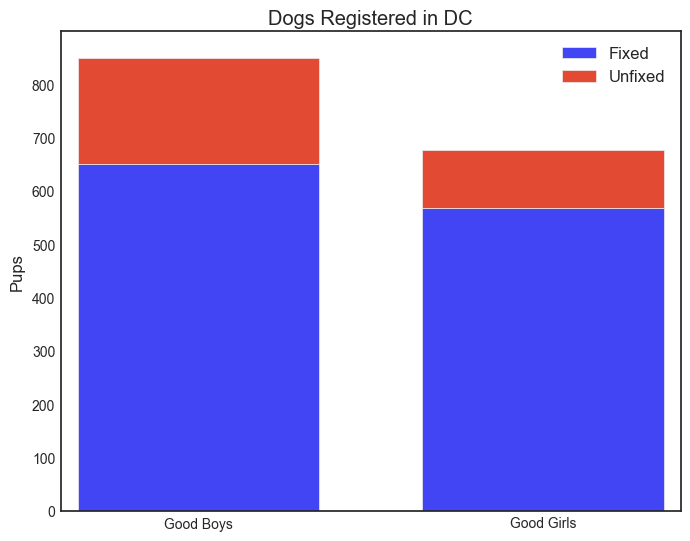

In [411]:
N = 2
yesmales = 651
yesfemales = 569
nomales = 199
nofemales = 108
total = 1527

Fixed = (yesmales,yesfemales)
Unfixed = (nomales,nofemales)

ind = np.arange(N)    # the x locations for the groups
margin = .6
width = (2.-1.*margin)/N      # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, Unfixed, width, color='#4245f4')
# p1 = plt.bar(ind, Unfixed, width, color='#f4c942')
# p2 = plt.bar(ind, Fixed, width)
# p2 = plt.bar(ind, Fixed, width, color='#4245f4',
#             bottom=Fixed)

p1 = plt.bar(ind, Fixed, width, color='#4245f4', align='center') #, yerr=menStd)
p2 = plt.bar(ind, Unfixed, width, align = 'center', bottom=Fixed)
# ,
#              bottom=menMeans, yerr=womenStd)

plt.style.use('seaborn-white')
plt.ylabel('Pups')
plt.title('Dogs Registered in DC')
plt.xticks(ind, ('Good Boys', 'Good Girls'))
plt.yticks(np.arange(0, 900, 100))
plt.legend((p1[0], p2[0]), ('Fixed', 'Unfixed'))
plt.savefig('dogs_registered_mf.png')
plt.show()


In [412]:
total_rows

[['',
  '',
  'Total Licenses: 36',
  '',
  'Unique Animals: 36',
  '',
  '',
  'Total Price: $925.00',
  ''],
 ['20001',
  '',
  'Total Licenses: 107',
  '',
  'Unique Animals: 104',
  '',
  '',
  'Total Price: $2,095.00',
  ''],
 ['20002',
  '',
  'Total Licenses: 245',
  '',
  'Unique Animals: 236',
  '',
  '',
  'Total Price: $4,745.00',
  ''],
 ['20003',
  '',
  'Total Licenses: 63',
  '',
  'Unique Animals: 63',
  '',
  '',
  'Total Price: $1,015.00',
  ''],
 ['20004',
  '',
  'Total Licenses: 2',
  '',
  'Unique Animals: 2',
  '',
  '',
  'Total Price: $30.00',
  ''],
 ['20005',
  '',
  'Total Licenses: 14',
  '',
  'Unique Animals: 14',
  '',
  '',
  'Total Price: $210.00',
  ''],
 ['20006',
  '',
  'Total Licenses: 2',
  '',
  'Unique Animals: 2',
  '',
  '',
  'Total Price: $30.00',
  ''],
 ['20007',
  '',
  'Total Licenses: 33',
  '',
  'Unique Animals: 33',
  '',
  '',
  'Total Price: $530.00',
  ''],
 ['20008',
  '',
  'Total Licenses: 42',
  '',
  'Unique Animals: 42',
  

In [413]:
totalr = sum(total_rows,[]) # flatten data
n = 27 # there are 27 obs
total_data = [totalr[i:i+n] for i in range(0, len(totalr), n)]
print(total_data[:5])

# read in as pandas dataframe
alldogs= pd.DataFrame(total_data, columns=total_data[0])

[['', '', 'Total Licenses: 36', '', 'Unique Animals: 36', '', '', 'Total Price: $925.00', '', '20001', '', 'Total Licenses: 107', '', 'Unique Animals: 104', '', '', 'Total Price: $2,095.00', '', '20002', '', 'Total Licenses: 245', '', 'Unique Animals: 236', '', '', 'Total Price: $4,745.00', ''], ['20003', '', 'Total Licenses: 63', '', 'Unique Animals: 63', '', '', 'Total Price: $1,015.00', '', '20004', '', 'Total Licenses: 2', '', 'Unique Animals: 2', '', '', 'Total Price: $30.00', '', '20005', '', 'Total Licenses: 14', '', 'Unique Animals: 14', '', '', 'Total Price: $210.00', ''], ['20006', '', 'Total Licenses: 2', '', 'Unique Animals: 2', '', '', 'Total Price: $30.00', '', '20007', '', 'Total Licenses: 33', '', 'Unique Animals: 33', '', '', 'Total Price: $530.00', '', '20008', '', 'Total Licenses: 42', '', 'Unique Animals: 42', '', '', 'Total Price: $720.00', ''], ['20009', '', 'Total Licenses: 89', '', 'Unique Animals: 86', '', '', 'Total Price: $1,545.00', '', '20010', '', 'Total L

In [414]:
alldogs.describe()

,,,Total Licenses: 36,,Unique Animals: 36,,,Total Price: $925.00,,20001,...,,20002,,Total Licenses: 245,,Unique Animals: 236,,,"Total Price: $4,745.00",
count,13,13,13,13,13,13,13,13,13,13,...,13,12,12,12,12,12,12,12,12,12
unique,13,1,9,1,9,1,1,9,1,13,...,1,12,1,9,1,9,1,1,10,1
top,20009,,Total Licenses: 1,,Unique Animals: 1,,,Total Price: $15.00,,20017,...,,20008,,Total Licenses: 1,,Unique Animals: 1,,,Total Price: $15.00,
freq,1,13,5,13,5,13,13,5,13,1,...,13,1,12,4,12,4,12,12,3,12


In [415]:
alldogs = alldogs.transpose()

In [416]:
alldogs

,0,1,2,3,4,5,6,7,8,9,10,11,12
,,20003,20006,20009,20012,20016,20019,20032,20052,20774,20833,22033,37205
,,,,,,,,,,,,,
Total Licenses: 36,Total Licenses: 36,Total Licenses: 63,Total Licenses: 2,Total Licenses: 89,Total Licenses: 31,Total Licenses: 40,Total Licenses: 173,Total Licenses: 95,Total Licenses: 1,Total Licenses: 1,Total Licenses: 1,Total Licenses: 1,Total Licenses: 1
,,,,,,,,,,,,,
Unique Animals: 36,Unique Animals: 36,Unique Animals: 63,Unique Animals: 2,Unique Animals: 86,Unique Animals: 31,Unique Animals: 40,Unique Animals: 170,Unique Animals: 93,Unique Animals: 1,Unique Animals: 1,Unique Animals: 1,Unique Animals: 1,Unique Animals: 1
,,,,,,,,,,,,,
,,,,,,,,,,,,,
Total Price: $925.00,Total Price: $925.00,"Total Price: $1,015.00",Total Price: $30.00,"Total Price: $1,545.00",Total Price: $570.00,Total Price: $670.00,"Total Price: $4,275.00","Total Price: $3,070.00",Total Price: $15.00,Total Price: $15.00,Total Price: $15.00,Total Price: $15.00,Total Price: $15.00
,,,,,,,,,,,,,
20001,20001,20004,20007,20010,20014,20017,20020,20036,20616,20782,20854,22043,


In [422]:
dogs.fixed_gender[1]

'Yes / Male'

In [441]:
dogs.fixed_gender.head(10)

0      Yes / Male
1      Yes / Male
2    Yes / Female
3    Yes / Female
4      Yes / Male
5      Yes / Male
6    Yes / Female
7      Yes / Male
8      Yes / Male
9    Yes / Female
Name: fixed_gender, dtype: object

In [440]:
dogs['male'] = dogs.fixed_gender.any(dogs.fixed_gender['Yes / Male'],dogs.fixed_gender['No / Male'])

KeyError: 'Yes / Male'

In [450]:
type(dogs.fixed_gender)

pandas.core.series.Series

In [459]:
dogs = pd.concat([dogs,pd.get_dummies(dogs['fixed_gender'])],axis=1)

In [469]:
dogs.columns

Index([u'Unnamed: 0', u'License Number', u'License Status',
       u'Status Date/Time', u'License Type', u'Unnamed: 5', u'License Issuer',
       u'License Reseller', u'License Price', u'License Site',
       u'License Length', u'Unnamed: 11', u'Expire Date', u'Renewal Yes/No',
       u'Unnamed: 14', u'Rabies Vaccination', u'Vaccination Date',
       u'Revaccination Date', u'Provider', u'Animal Number', u'ARN',
       u'Animal Name', u'DOB', u'Species', u'Primary / Secondary Breed',
       u'Unnamed: 25', u'Color', u'Altered / Gender', u'dog_days',
       u'dog_years', u'breed', u'fixed_gender', u'No / Female', u'No / Male',
       u'No / Unknown', u'Yes / Female', u'Yes / Male', u'Yes / Unknown',
       u'male', u'female'],
      dtype='object')

In [470]:
dogs['name']=dogs['Animal Name']

In [461]:
dogs['male']= dogs['No / Male']+dogs['Yes / Male']

In [462]:
dogs['female']= dogs['No / Female']+dogs['Yes / Female']

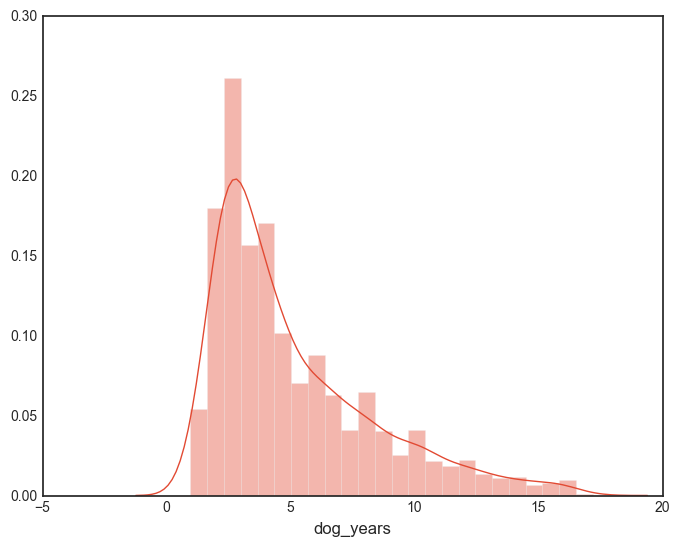

In [489]:
dogyears.fig = sns.distplot(dogs.dog_years[dogs.dog_years.notnull()])
plt.savefig('dc_dog_years.png')

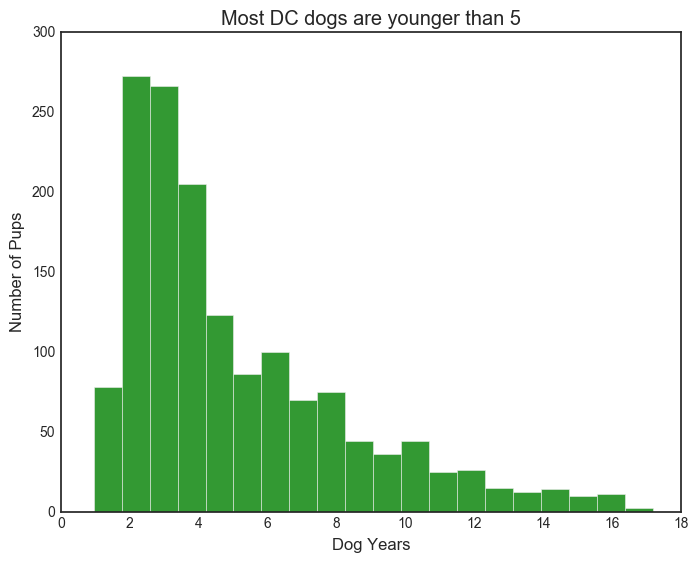

In [490]:
plt.hist(dogs.dog_years[dogs.dog_years.notnull()],bins = 20, color = 'green',alpha = .8)
plt.xlabel("Dog Years")
plt.ylabel('Number of Pups')
plt.title("Most DC dogs are younger than 5")
plt.savefig('dog_years_dc.jpg')

In [497]:
breeds = dogs.groupby(dogs.breed)

In [501]:
breeds.value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [471]:
dogs[dogs.male == 1].name.value_counts().head(20)

Blue       10
King        8
Rocky       7
Charlie     6
Nino        6
Max         6
Zeus        6
Jack        5
Prince      5
Oreo        5
Spike       5
Rex         4
Remy        4
Rambo       4
Lucky       4
Teddy       4
Duke        4
Frankie     4
Jax         4
Powder      3
Name: name, dtype: int64

In [473]:
dogs[dogs.female == 1].name.value_counts().head(20)

Lady        14
Chloe       11
Bella       10
Sheba        7
Princess     6
Lola         6
Sasha        6
Coco         6
Lucy         5
Diamond      4
Missy        4
Storm        4
Hazel        4
Bailey       4
Remy         4
Diva         4
Sophie       4
Cookie       4
London       3
Blue         3
Name: name, dtype: int64

In [502]:
oreos = dogs[dogs.name =='Oreo']
oreos

,Unnamed: 0,License Number,License Status,Status Date/Time,License Type,Unnamed: 5,License Issuer,License Reseller,License Price,License Site,...,fixed_gender,No / Female,No / Male,No / Unknown,Yes / Female,Yes / Male,Yes / Unknown,male,female,name
207,207,6821,Expired,42487.04167,Dog License S/N,NaN,DC Department of Health,NaN,15.0,New York Ave,...,Yes / Male,0,0,0,0,1,0,1,0,Oreo
222,222,7115,Expired,42487.04167,Dog License S/N,NaN,DC Department of Health,NaN,15.0,New York Ave,...,Yes / Male,0,0,0,0,1,0,1,0,Oreo
324,324,3938,Current,42508.80534,Dog License S/N,NaN,DC Department of Health,NaN,15.0,New York Ave,...,No / Male,0,1,0,0,0,0,1,0,Oreo
1255,1255,7619,Current,42328.75636,Dog License S/N,NaN,DC Department of Health,NaN,15.0,New York Ave,...,Yes / Male,0,0,0,0,1,0,1,0,Oreo
1391,1391,7130,Cancelled (Intake-Return),42148.79360,Dog License S/N,NaN,DC Department of Health,NaN,15.0,New York Ave,...,Yes / Male,0,0,0,0,1,0,1,0,Oreo
1467,1467,7548,Current,42384.43935,Dog License No S/N,NaN,DC Department of Health,NaN,50.0,New York Ave,...,No / Female,1,0,0,0,0,0,0,1,Oreo


In [504]:
dogs.breed.value_counts()

Terrier, Pit Bull / Mix                                    233
Terrier, American Staffordshire / Mix                      100
Terrier, Yorkshire / Mix                                    70
Retriever, Labrador / Mix                                   62
Terrier / Mix                                               59
Terrier, American Pit Bull / Mix                            55
Shih Tzu / Mix                                              41
Chihuahua, Short Coat / Mix                                 29
Beagle / Mix                                                29
Bulldog, American / Mix                                     26
Shepherd / Mix                                              25
German Shepherd / Mix                                       24
Terrier, Jack Russell / Mix                                 24
Poodle, Miniature / Mix                                     23
Boxer / Mix                                                 20
Hound / Mix                                            